In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

In [2]:
mydata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
mydata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
mydata.shape
#The Data has 5000 rows and 14 Columns

(5000, 14)

In [4]:
mydata.info()
#Data has all integer values with and exception of CCAvg which is a float value. 
#Further there are no-null values in any of the 14 attributes across 5000 points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
print(mydata.isnull().values.any())
#A revalidation that there are no null values in the dataset

False


In [6]:
mydata.groupby('Personal Loan').count()
#480 out of 5000 customers accepted the personal loan in last capmpaign. 
#This is same as ~9% conversion rate given in the context section of the case.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [7]:
mydata.describe().transpose()
#This is a summary table to show the spread of all attributes

#The mean age of the data set is 45.3 Yrs. With customers ranging from 23 Yrs of age to 67 yrs of age

#The mean experience of Dataset is 20 Yrs with max experience being 43 yrs. A negative data point as min can't be explained.

#Income is averaged at $73K/Year with min of $8K/Yr and Max of $224K/Yr. 

#About 75% of customers are below $98K - so this attribute will be skewed towards min/lower incomes

#The mean family size is 2.4. However, the data seema to be spread evenly acorss 1,2,3 and max 4 family members

#The average credit card spend is $1.9K/mo. 75% of the customers spending upto $2.5k/mo and highest being $10K/mo.
#CCAvg attribute seems to be skewed with right tail - low spend with higher percentage of customers

#The educationd attribute seems to be spread evenly across Undergrad, Graduate and Advanced/Prof levels

#The ZIP code summary is not relevant as the attribute is spatial in nature and min/max/mean dont hold much significance
#Same goes for ID - its system generated number - 5 pt summary is not of much significance

#Below is the consumption of different liability products/indidcators of liability customers
#10% customers have Securities Account
#6% CUstomers have CD Account
#60% Customers use internet banking facilities

#Further, 29% customers use a credit card issued by the bank
#The mean of "value of house mortgage (if any)" is $56.5 with over 50% customers not having any mortgage. 
#The attribute seems to be highly skewed with long left tail
#Personal loans are also left tail with only 9.6% of customers having any personal loan.
#This also indicated that there is a sizable number of target audience for selling fresh Personal Loan product(s).


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000264F7776D88>,
      dtype=object)

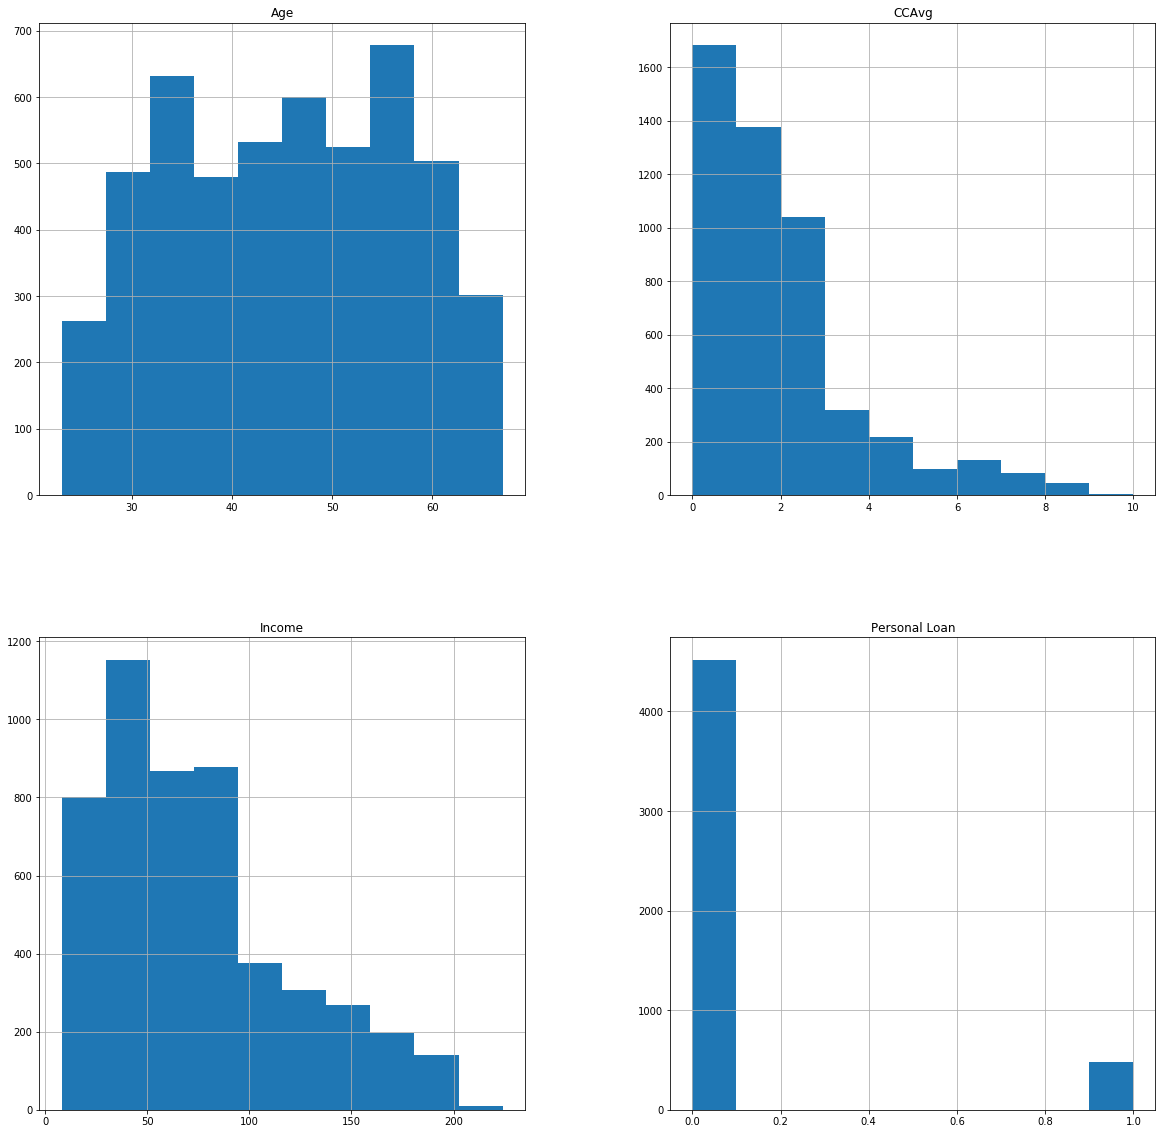

In [8]:
mydata.hist(column=['CCAvg','Age','Personal Loan','Income'],figsize=(20,20))

#The histograms give addl information that age of customers in dataset is evenly spread across 20+ Yrs - less than 70
#Avg Credit card spend is heavily skewed with right tail- with most customers spending less and a very few spending over $3K/mo
#Customer income is also skewed with right tail with most customers earning less than $100K/Yr
#Very few customers have purchased personal loan - highly skewed towards with neglible values on right/bought personal loan

In [9]:
mydata.skew()
#As seen above as well - Income, Average CC Sepnd/mo, Consumption of personal loan product, mortgage, securities A/C, CD A/C
#is highly skewed with tight hand tail being longer. Income would have a slight right tail
#Hence, the high skewness values (>1) indicate a long right tail and (<-1) indicate a left tail
#It is notewortthy that Income is lesser skewed as compared to prodycts like mortgage, personal loan, CD A/C etc. 
#There are indications of an undercapotalized propensity 

ID                     0.000000
Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

In [10]:
for column in mydata[['Age','Income','Personal Loan']]:
    val = column
    q1 = mydata[val].quantile(0.25)
    q3 = mydata[val].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-(1.5*iqr)
    fence_high = q3+(1.5*iqr)
    df_out = mydata.loc[(mydata[val] < fence_low) | (mydata[val] > fence_high)]
    if df_out.empty:
        print('No Outliers in the ' + val + ' column of given dataset')
    else:
        print('There are Outliers in the ' + val + ' column of given dataset')
        
#Age is evenly distributed with no outliers
#However, income has outliers and this might need some attention to fine tune the targeting ALGORITHM
#Personal Loan has outliers but this is understandable as only 9.6% of customers have taken personal loan

No Outliers in the Age column of given dataset
There are Outliers in the Income column of given dataset
There are Outliers in the Personal Loan column of given dataset


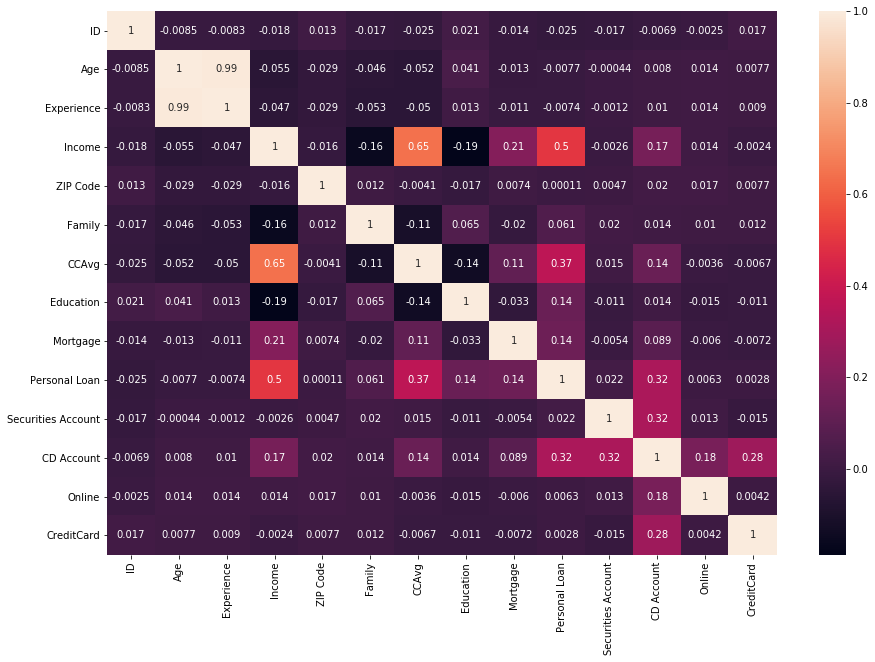

In [11]:
plt.figure(figsize = (15,10))
sns.heatmap(mydata.corr(), annot = True )

#There is high positive co relation between income and avg. CC Spend. People with higher Income sepnd mroe on their credit cards
#There is also a noticable positive co-relation between Persinal loan and income. 
#People with higher income take more personal loans as compared with people from lower income group
#Average CC spend and Personal loan also have slight positive co relation
# Slight positive corelation of CD Account with Personal loan and Securities account

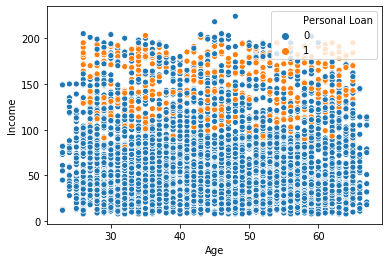

In [12]:
sns.scatterplot(y = 'Income', x = 'Age', data = mydata, hue = 'Personal Loan')
#Its clear with the scatterplot that customers with higher income purchase personal loan
#This is true across all age groups 
#There is a visual appearance of approx $100K/Yr threshold after which the purchase of personal loan is very high

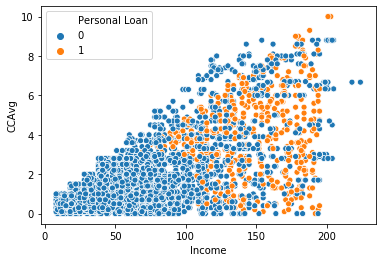

In [13]:
sns.scatterplot(x = 'Income', y = 'CCAvg', data = mydata, hue = 'Personal Loan')
#Again the purchase of personal loan for customer with income > $100K/Yr (approx) is very high
#There is however not much of change that occures with higher or lower CC Avg spend/mo

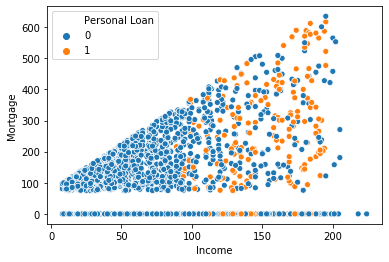

In [14]:
sns.scatterplot(y = 'Mortgage', x = 'Income', data = mydata, hue = 'Personal Loan')
#It appears like customers with active mortgage have higher purchase of personal loan

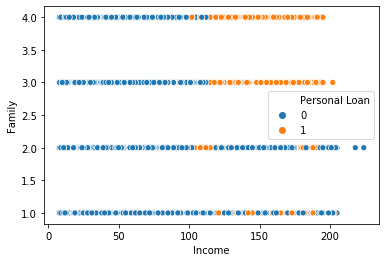

In [15]:
sns.scatterplot(y = 'Family', x = 'Income', data = mydata, hue = 'Personal Loan')
#Customers with Family size>=3 buy more personal loans as compared to families with <3 size
#A sweet spot is visibile now for customers with income>$ 100K/Yr and Family Size >=3
#This can also be coupled with customers who have active mortgages

In [16]:
mydata = mydata.drop(['ID','Experience', 'ZIP Code', 'Age', 'Online', 'CreditCard', 'Securities Account'], axis = 1)
#Dropping the non-relevant attributes from the dataset i.e. ID, Experience, ZIP Code, Age, Online Banking, 
#Credit Card and Securities account

In [17]:
mydata.head()
#Checking the top 5 rows of the modified dataset

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49,4,1.6,1,0,0,0
1,34,3,1.5,1,0,0,0
2,11,1,1.0,1,0,0,0
3,100,1,2.7,2,0,0,0
4,45,4,1.0,2,0,0,0


In [18]:
mydata[['Income', 'CCAvg', 'Mortgage']] = mydata[['Income', 'CCAvg', 'Mortgage']] * 1000
#Normalizing Income, CC Avg Spend and Mortgage by a factor of 1K - to bring $ values to same scale

In [19]:
mydata.head()
#The Income, CC Avg and Mortgage have incresed to 1000x

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,CD Account
0,49000,4,1600.0,1,0,0,0
1,34000,3,1500.0,1,0,0,0
2,11000,1,1000.0,1,0,0,0
3,100000,1,2700.0,2,0,0,0
4,45000,4,1000.0,2,0,0,0


In [20]:
a = mydata.drop('Personal Loan', axis = 1)
b = mydata['Personal Loan']

In [21]:
# Running the logistic classification - splitting data in 70:30 ratio

a_train, a_test, b_train, b_test = train_test_split(a,b, test_size = 0.30, random_state = 1)

trainingData = preprocessing.scale(a_train)
testData = preprocessing.scale(a_test)

logReg = LogisticRegression()
logReg.fit(trainingData, b_train)
pred = logReg.predict(testData)
logReg_score = logReg.score(testData, b_test)
print('logReg_score: ' , logReg_score)
accuracy = logReg.score(testData, b_test) * 100
accuracies = {}
accuracies['LR'] = accuracy
print('Logistic Regression Accuracy: ', accuracy)
print('Confusion Matrix: ')
print(metrics.confusion_matrix(b_test, pred))

#Test Accuracy of Logistic Regression is 94.39% confusion matrix Analysis:
#Correct Prediction :   True positive and Negative -     82 takes loan and 1334 does not take loan. 
#Incorrect Prediction : False positive and negative -    17 takes loan but atually no (Type I error) 
                                        # and 67 does not take loan but actually yes (Type II error)

logReg_score:  0.944
Logistic Regression Accuracy:  94.39999999999999
Confusion Matrix: 
[[1334   17]
 [  67   82]]


In [22]:
#Running Naive Bayes

nb = GaussianNB()
nb.fit(trainingData, b_train)
expected  = b_test
predicted = nb.predict(testData)
print(metrics.classification_report(expected, predicted))
accuracy = (metrics.accuracy_score(expected, predicted))*100
accuracies['NB'] = accuracy
print('Naive Bayes accuracy: ', accuracy)
print('Confusion Matrix: ')
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.56      0.46       149

    accuracy                           0.87      1500
   macro avg       0.67      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500

Naive Bayes accuracy:  87.2
Confusion Matrix: 
[[1225  126]
 [  66   83]]


In [ ]:
#Correct Prediction : True positive and Negative - 83 takes loan and 1225 does not take loan. 
#Incorrect Prediction : False positive and negative - 126 takes loan but atually no (Type I error) 
                                        #and 66 does not take loan but actually yes (Type II error)

In [23]:
#Running K-NN
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

knn = KNeighborsClassifier(n_neighbors = 2, weights = 'distance')
c = a.apply(zscore)
c.describe()

,Income,Family,CCAvg,Education,Mortgage,CD Account
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.203704e-16,7.850609e-16,4.758416e-17,-6.315837e-16,2.568612e-16,4.426903e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-2.535403e-01
25%,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-2.535403e-01
50%,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-2.535403e-01
75%,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-2.535403e-01
max,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,3.944146e+00


In [24]:
a = np.array(c)
print(a.shape)
b = np.array(b)
print(b.shape)

(5000, 6)
(5000,)


In [25]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.30, random_state=1)
knn.fit(a_train, b_train)
prediction = knn.predict(a_test)
knn.score(a_test, b_test)
accuracy = metrics.accuracy_score(b_test, prediction)*100
print(accuracy)
accuracies['KNN'] = accuracy
print('KNN accuracy: ', accuracy)
print('Confusion Matrix: ')
print(metrics.confusion_matrix(b_test, prediction))

97.2
KNN accuracy:  97.2
Confusion Matrix: 
[[1339   12]
 [  30  119]]


In [ ]:
#Test Accuracy using KNN Algorithm is 97.2 confusion matrix Analysis:

#Correct Prediction : True positive and Negative - 119 takes loan and 1339 does not take loan. 
#Incorrect Prediction : False positive and negative - 12 takes loan but atually no (Type I error) 
#and 30 does not take loan but actually yes (Type II error)

In [26]:
#Running SVM
from sklearn import svm

svm = svm.SVC(gamma = 0.025, C = 3)
svm.fit(trainingData, b_train)
svm.score(testData, b_test)
predicted = svm.predict(testData)
accuracy = (metrics.accuracy_score(b_test, predicted))*100
accuracies['SVM'] = accuracy
print('Support Vector Machines accuracy: ', accuracy)
print('Confusion Matrix: ')
print(metrics.confusion_matrix(b_test, predicted))

Support Vector Machines accuracy:  96.73333333333333
Confusion Matrix: 
[[1346    5]
 [  44  105]]


In [ ]:
#Test Accuracy using SVM Algorithm is 96.7 confusion matrix Analysis:
#Correct Prediction : True positive and Negative - 105 takes loan and 1346 does not take loan. 
#Incorrect Prediction : False positive and negative - 5 takes loan but atually no (Type I error) 
#and 44 does not take loan but actually yes (Type II error)

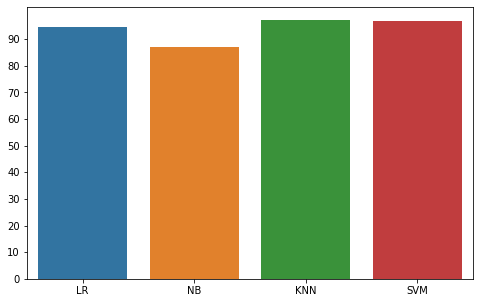

In [27]:
#Plotting the performace of all 4 Supervised Learning Models as done above. NB performs the worst
plt.figure(figsize = (8,5))
plt.yticks(np.arange(0,100,10))
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()))

In [28]:
#Printing Confusion Matrix for all 4 models
y_cm_lr = logReg.predict(testData)
y_cm_nb = nb.predict(testData)
y_cm_knn = knn.predict(testData)
y_cm_svm = svm.predict(testData)

In [29]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(b_test, y_cm_lr)
cm_knn = confusion_matrix(b_test, y_cm_knn)
cm_svm = confusion_matrix(b_test, y_cm_svm)
cm_nb = confusion_matrix(b_test, y_cm_nb)

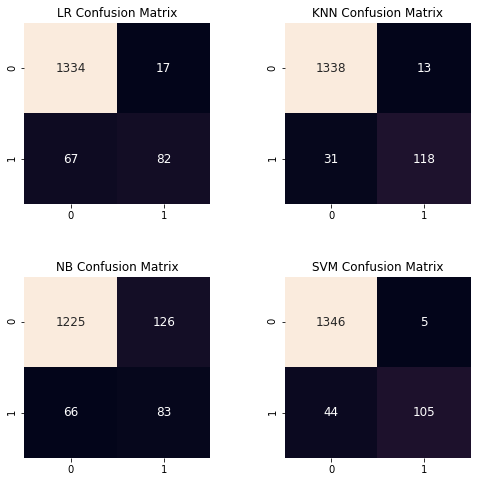

In [30]:
plt.figure(figsize = (8,8))
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)

plt.subplot(2,2,1)
plt.title("LR Confusion Matrix")
sns.heatmap(cm_lr,annot=True,fmt="d",cbar=False, annot_kws={"size": 12})

plt.subplot(2,2,2)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn, annot = True, fmt = 'd', cbar = False, annot_kws = {"size": 12})

plt.subplot(2,2,3)
plt.title("NB Confusion Matrix")
sns.heatmap(cm_nb, annot = True, fmt = 'd', cbar = False, annot_kws = {"size": 12})

plt.subplot(2,2,4)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm, annot = True, fmt = 'd', cbar = False, annot_kws = {"size": 12})

In [ ]:
#KNN model is the best model with the analysis done with 97.2% Accuracy and following confusion matrix
#Correct Prediction : True positive and Negative - 119 takes loan and 1339 does not take loan. 
#Incorrect Prediction : False positive and negative - 12 takes loan but atually no (Type I error) 
                                    #and 30 does not take loan but actually yes (Type II error)